## Bilateral Filter

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@50987afc

This `Op` is designed to smooth out slightly noisy images while still preserving sharp edges, unlike most other smoothing filters. Check out the [Wikipedia page](https://en.wikipedia.org/wiki/Bilateral_filter) for an explanation of the filter itself. Let's take a look at how this `Op` is called:

In [2]:
ij.op().help('bilateral')

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.bilateral.DefaultBilateral(
		RandomAccessibleInterval out,
		RandomAccessibleInterval in,
		double sigmaR,
		double sigmaS,
		int radius)

Let's explain the parameters:

* `RandomAccessibleInterval out`: the output image
* `RandomAccessibleInterval in`: the input image
* `double sigmaR`: this sigma denotes the range smoothing parameter; the larger this parameter, the closer the effects of this filter are to a [Gaussian](gauss.ipynb) convolution.
* `double sigmaS`: this sigma denotes the spatial smoothing parameter; the larger this parameter, the more features get smoothened out.
* `int radius`: this parameter defines the radius of the rectangle (centered at the current pixel) that the filter will operate over. Larger radii will smooth the image more at the cost of increased computation time.

Let's grab an image:

[INFO] Populating metadata
[INFO] Populating metadata


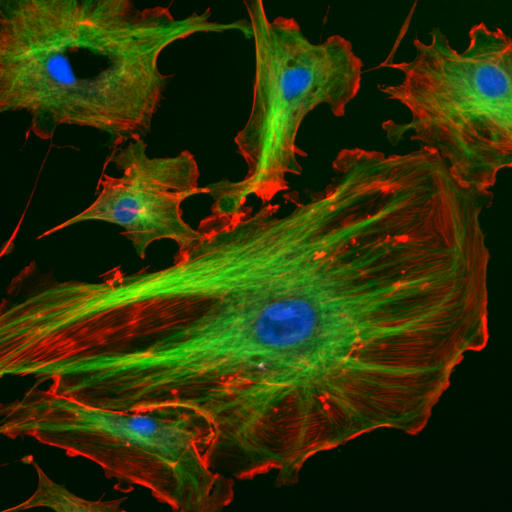

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/FluorescentCells.jpg")
ij.notebook().display(input)

Let's run this image through the filter. This particular filter can take upwards of 10 seconds to run on this image with these settings due to the intensive nature of the algorithm.

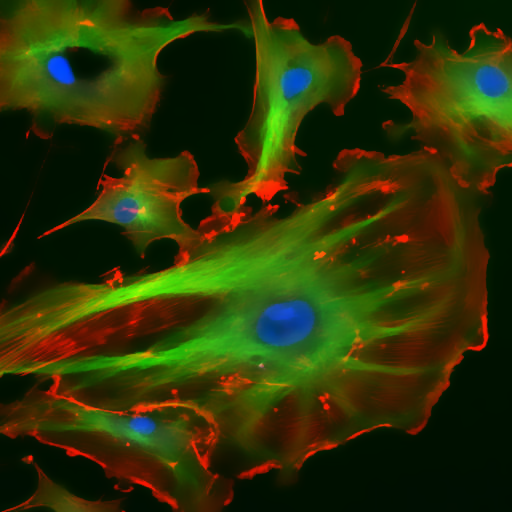

In [4]:
import net.imglib2.type.numeric.real.DoubleType

//define the parameters
sigmaR = 30
sigmaS = 100
radius = 7

//TODO display side by side with original.
actualOutput = ij.op().create().img(input, new DoubleType())
ij.op().filter().bilateral(actualOutput, input, sigmaR, sigmaS, radius)
ij.notebook().display(actualOutput)

Note that `sigmaR` is at an extreme and `sigmaS` even more so, to illustrate the nature of this algorithm. Note the red edges and blobs within the cells being perfectly intact after the completion of the filter, yet the green streaks and blue blobs within being smoothened out. This is the power of the bilateral filter.